In [40]:
#import libaries
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


In [41]:
mnist = tf.keras.datasets.mnist

In [13]:
mnist

<module 'keras.datasets.mnist' from '/opt/anaconda3/lib/python3.12/site-packages/keras/datasets/mnist/__init__.py'>

In [14]:
# Load data into training and testing sets
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
y_train.shape

(60000,)

In [20]:
X_test.shape

(10000, 28, 28)

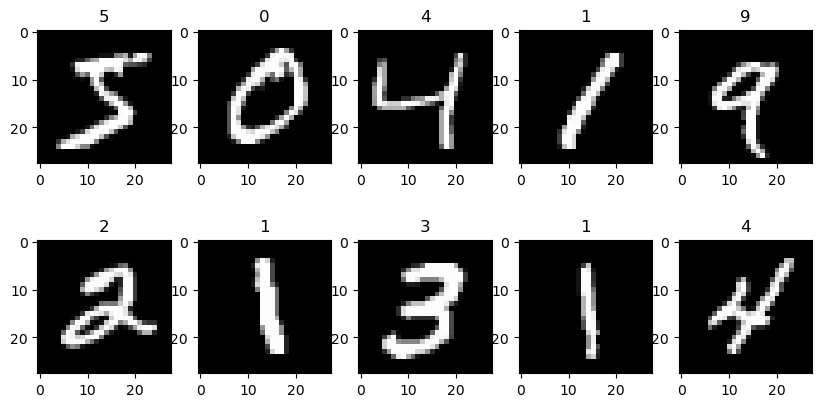

In [21]:
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"{y_train[i]}")
plt.show()

In [24]:
X_train = X_train.reshape(-1, 28, 28, 1).astype(float)
X_test = X_test.reshape(-1, 28, 28, 1).astype(float)

In [26]:
#we call models
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')    
])

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [32]:
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8211 - loss: 1.3702 - val_accuracy: 0.9808 - val_loss: 0.0687
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9774 - loss: 0.0741 - val_accuracy: 0.9815 - val_loss: 0.0682
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9842 - loss: 0.0504 - val_accuracy: 0.9823 - val_loss: 0.0593
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9888 - val_loss: 0.0452
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9898 - loss: 0.0326 - val_accuracy: 0.9892 - val_loss: 0.0440


In [33]:
test_loss,test_acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0603


In [34]:
print(f"{test_acc:.3f}")

0.986


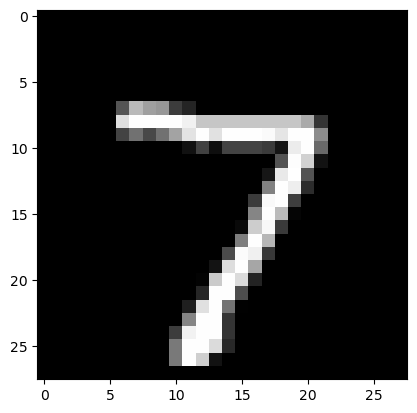

In [37]:
plt.imshow(X_test[0].reshape(28,28) , cmap ='grey')

In [36]:
pred = model.predict(X_test[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [39]:
print(f"{pred.argmax()}")

7
